In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#other useful imports 
import numpy as np
import scipy as sp
import scipy.stats as stats
import h5py

from utils import featurewise_norm


In [2]:
#ok let's load our usual data 
DATA_PATH = "/home/chengxuz/Class/psych253_2018/data/ventral_neural_data.hdf5"
Ventral_Dataset = h5py.File(DATA_PATH)

In [3]:
Neural_Data = Ventral_Dataset['time_averaged_trial_averaged'][:]
IT_NEURONS = Ventral_Dataset['neural_meta']['IT_NEURONS']
V4_NEURONS = Ventral_Dataset['neural_meta']['V4_NEURONS']
V4_Neural_Data = Neural_Data[:, V4_NEURONS]
IT_Neural_Data = Neural_Data[:, IT_NEURONS]

var_level = Ventral_Dataset['image_meta']['variation_level'][:]
categories = Ventral_Dataset['image_meta']['category'][:]   #array of category labels for all images  --> shape == (5760,)
unique_categories = np.unique(categories)                #array of unique category labels --> shape == (8,)
objects = Ventral_Dataset['image_meta']['object_name'][:]   #array of object labels for all images --> shape == (5670,)
unique_objects = np.unique(objects)                      #array of unique object labels --> shape == (64,) 

objects_by_category = {c: np.unique(objects[categories == c]) 
                       for c in unique_categories}

#use numpy recarray object to store metadata 
meta_array = np.core.records.fromarrays(Ventral_Dataset['image_meta'].values(),
                                        names=Ventral_Dataset['image_meta'].keys())

meta_array.dtype


dtype((numpy.record, [(u'category', 'S7'), (u'image_id', 'S40'), (u'object_name', 'S24'), (u'rotation_xy', '<f8'), (u'rotation_xz', '<f8'), (u'rotation_yz', '<f8'), (u'size', '<f8'), (u'translation_y', '<f8'), (u'translation_z', '<f8'), (u'variation_level', 'S2')]))

# MDS

In [4]:
from sklearn.manifold import MDS

In [5]:
def plot_neural_mds(vl = 'V6', cat1 = 'Animals', cat2 = 'Faces', which_cmp=2):
    subset_inds1 = ((var_level == vl) & (categories == cat1)).nonzero()[0]
    subset_inds2 = ((var_level == vl) & (categories == cat2)).nonzero()[0]
    subset_inds = np.concatenate([subset_inds1, subset_inds2])
    IT_subset = IT_Neural_Data[subset_inds]
    category_subset = categories[subset_inds]

    cls = MDS(n_components=which_cmp)
    Xproj = cls.fit_transform(IT_subset)

    x = Xproj[:,0]
    y = Xproj[:,1]

    xb = x[category_subset == cat1]
    yb = y[category_subset == cat1]
    xc = x[category_subset == cat2]
    yc = y[category_subset == cat2]
    plt.scatter(xb, yb, color='b', label=cat1)
    plt.scatter(xc, yc, color='r', label=cat2)
    plt.axis('equal')
    plt.xlabel('Source 1')
    plt.ylabel('Source 2')
    plt.legend()

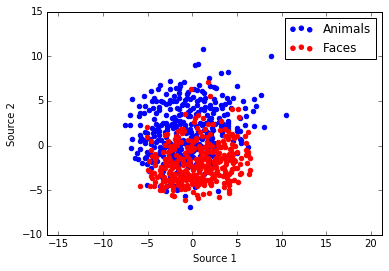

In [6]:
plot_neural_mds()

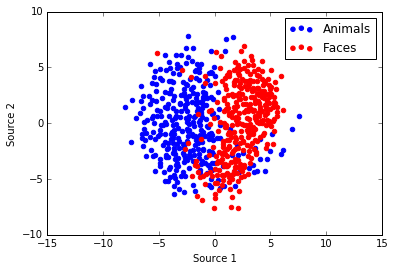

In [7]:
plot_neural_mds(vl='V3')

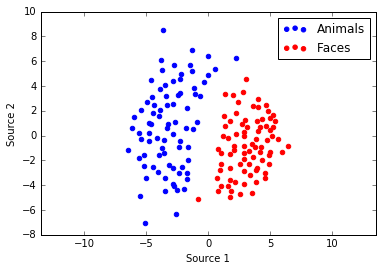

In [8]:
plot_neural_mds(vl='V0')